In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
dataset = pd.read_csv('/Users/Pratulya/Desktop/machine-learning/bootcamp/mnist_data/train.csv')
dataset = dataset.values
dataset.shape

(42000, 785)

In [63]:
X, y = dataset[:, 1:], dataset[:, 0]
X.shape, y.shape

((42000, 784), (42000,))

In [64]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [65]:
# Min-Max Scaler

X = (X - X.min()) / (X.max() - X.min())

In [75]:
class NeuralNetwork:
    
    def __init__(self, X, y):
        self.X = (X - X.min()) / (X.max() - X.min()) 
        self.y = y
        self.H1_size = 256
        self.H2_size = 64
        self.OUTPUT_SIZE = len(np.unique(y))
        self.INPUT_SIZE = X.shape[1]
        self.losses = []
        
        # Initialize weights
        self.W1 = np.random.randn(self.INPUT_SIZE, self.H1_size)
        self.W2 = np.random.randn(self.H1_size, self.H2_size)
        self.W3 = np.random.randn(self.H2_size, self.OUTPUT_SIZE)
        
        # Initialize biases
        self.b1 = np.random.random((1, self.H1_size))
        self.b2 = np.random.random((1, self.H2_size))
        self.b3 = np.random.random((1, self.OUTPUT_SIZE))
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        s = self.sigmoid(z)
        return s * (1 - s)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    def forward(self, x):
        Z1   = x.dot(self.W1) + self.b1 # (N,256) = (N,784)(784,256)(1,256)
        A1   = self.sigmoid(Z1)
        Z2   = A1.dot(self.W2) + self.b2
        A2   = self.sigmoid(Z2)
        Z3   = A2.dot(self.W3) + self.b3
        yhat = self.softmax(Z3)
        
        self.activations = [A1, A2, yhat]
        
        return yhat
    
    def backprop(self, x, y, yhat, learning_rate=0.01):
        
        A1, A2, yhat = self.activations
        
        # Compute Gradients
        delta3 = yhat - y
        dldw3  = A2.T.dot(delta3)
        dldb3  = delta3.sum(axis=0, keepdims=True)
        
        delta2 = delta3.dot(self.W3.T) * (A2 * (1 - A2))
        dldw2  = A1.T.dot(delta2)
        dldb2  = delta2.sum(axis=0, keepdims=True)
    
        delta1 = delta2.dot(self.W2.T) * (A1 * (1 - A1))
        dldw1  = x.T.dot(delta1)
        dldb1  = delta1.sum(axis=0, keepdims=True)

        # Update Weights
        self.W3 -= dldw3 * learning_rate
        self.b3 -= dldb3 * learning_rate
        
        self.W2 -= dldw2 * learning_rate
        self.b2 -= dldb2 * learning_rate
        
        self.W1 -= dldw1 * learning_rate
        self.b1 -= dldb1 * learning_rate
        
    def get_predictions(self, test):
        yhat = self.forward(test)
        preds = np.argmax(yhat, axis=1)
        return preds
    
    def accuracy(self, preds, true_labels):
        return (preds == true_labels).mean()
    
    def get_one_hot_vectors(self, labels):
        klasses = len(np.unique(labels))
        vectors = np.zeros((labels.shape[0], klasses))
        for i,l in enumerate(labels):
            vectors[i,l] = 1
        return vectors
    
    def compute_loss(self, y, yhat):
        # L = -E[y log(yhat)]
        return -np.sum(y * np.log(yhat))
    
    def train(self, learning_rate=0.01, epochs=10, batch_size=128):
        y_one_hot_vector = self.get_one_hot_vectors(self.y)

        for e in range(epochs):
            size = 0
            while size + batch_size < self.X.shape[0]:
                x_batch = self.X[size : size + batch_size]
                y_batch = self.y[size : size + batch_size]
                size += batch_size

                y_batch_one_hot = self.get_one_hot_vectors(y_batch)
                yhat_batch = self.forward(x_batch)
                self.backprop(x_batch, y_batch_one_hot, yhat_batch, learning_rate)

            yhat = self.forward(self.X)
            self.losses.append(self.compute_loss(y_one_hot_vector, yhat))
            print("Loss at Epoch [{}]: {}".format(e, self.losses[-1]))


    

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [83]:
nn = NeuralNetwork(X_train, y_train)

In [84]:
nn.INPUT_SIZE, nn.H1_size, nn.H2_size, nn.OUTPUT_SIZE

(784, 256, 64, 10)

In [85]:
print("First Loss: ", nn.compute_loss(nn.get_one_hot_vectors(nn.y), nn.forward(nn.X)))

First Loss:  244732.79398527896


In [86]:
nn.train(learning_rate=0.01, epochs=20, batch_size=128)

Loss at Epoch [0]: 16549.105115758346
Loss at Epoch [1]: 11137.655072040721
Loss at Epoch [2]: 9047.579270383438
Loss at Epoch [3]: 7758.222511254607
Loss at Epoch [4]: 6887.466820475377
Loss at Epoch [5]: 6181.900570270475
Loss at Epoch [6]: 5560.948912811911
Loss at Epoch [7]: 5032.9763391953275
Loss at Epoch [8]: 4559.605878339384
Loss at Epoch [9]: 4148.386498990363
Loss at Epoch [10]: 3790.454728247953
Loss at Epoch [11]: 3478.669716575026
Loss at Epoch [12]: 3212.2273073463
Loss at Epoch [13]: 2960.487798722305
Loss at Epoch [14]: 2724.775782953704
Loss at Epoch [15]: 2502.741460704098
Loss at Epoch [16]: 2303.007161958728
Loss at Epoch [17]: 2124.073670061039
Loss at Epoch [18]: 1962.1694172564166
Loss at Epoch [19]: 1813.312940293968


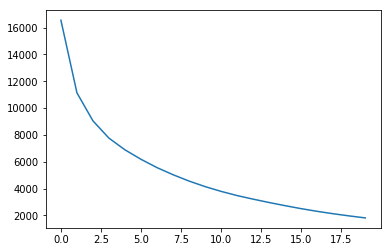

In [87]:
plt.figure()
plt.plot(nn.losses)
plt.show()

In [88]:
preds = nn.get_predictions(X_test)
print("Testing Acc: ", nn.accuracy(preds, y_test))

train_preds = nn.get_predictions(X_train)
print("Training Acc:", nn.accuracy(train_preds, y_train))

Testing Acc:  0.9280952380952381
Training Acc: 0.9854464285714286
